In [ ]:
!pip install tensorflow matplotlib
import tensorflow as tf

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
import os
os.chdir("/content/drive/MyDrive/blood_dataset")

In [ ]:
!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116932 sha256=cd25586486410bfd20040c864b8c60f7474dc05bda0fdb279b1ef2e129425de5
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [ ]:
import dataset_without_pytorch

In [ ]:
from dataset_without_pytorch import get_loader

In [ ]:
from tqdm import tqdm
import numpy as np

import medmnist
from medmnist import INFO, Evaluator

print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

data_flag = 'bloodmnist'

download = True


BATCH_SIZE = 128


info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(dataset_without_pytorch, info['python_class'])

MedMNIST v2.2.2 @ https://github.com/MedMNIST/MedMNIST/


In [ ]:
BATCH_SIZE = 128
# load the data
train_dataset = DataClass(split='train', download=download)
test_dataset = DataClass(split='test', download=download)
validation_dataset = DataClass(split='val', download=download)

train_loader = get_loader(dataset=train_dataset, batch_size=BATCH_SIZE)
test_loader = get_loader(dataset=test_dataset, batch_size=BATCH_SIZE)
val_loader = get_loader(dataset=validation_dataset, batch_size=BATCH_SIZE)

100%|██████████| 35461855/35461855 [00:02<00:00, 16246301.71it/s]


Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz


In [ ]:
train_images=train_dataset.imgs
train_labels=train_dataset.labels
val_images=validation_dataset.imgs
val_labels=validation_dataset.labels
test_images=test_dataset.imgs
test_labels=test_dataset.labels

In [ ]:
train_dataset

Dataset BloodMNIST (bloodmnist)
    Number of datapoints: 11959
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    License: CC BY 4.0

In [ ]:
test_dataset

Dataset BloodMNIST (bloodmnist)
    Number of datapoints: 3421
    Root location: /root/.medmnist
    Split: test
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    License: CC BY 4.0

In [ ]:
validation_dataset

Dataset BloodMNIST (bloodmnist)
    Number of datapoints: 1712
    Root location: /root/.medmnist
    Split: val
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    License: CC BY 4.0

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#import tensorflow as tf
#data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/blood_dataset/train')

Found 11959 files belonging to 8 classes.


In [ ]:
#data_iterator = data.as_numpy_iterator()

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, LearningRateScheduler

from keras.utils import to_categorical

In [ ]:
import tensorflow as tf

# Assuming you have the correct data shapes and labels as shown in previous responses

# Define the modified model
model = tf.keras.Sequential([
    # Add Convolutional Layers for feature extraction
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.BatchNormalization(),  # Add Batch Normalization
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),  # Add Batch Normalization
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.GlobalAveragePooling2D(),  # Reduce spatial dimensions
    # Add LSTM layers after CNN feature extraction
    tf.keras.layers.Reshape((1, 64)),  # Reshape to (batch_size, time_steps, flattened_features)
    tf.keras.layers.LSTM(128, activation='relu', return_sequences=True, dropout=0.3),  # Add dropout
    tf.keras.layers.LSTM(128, activation='relu'),  # Add dropout
    # Additional Dense layer for better feature representation
    tf.keras.layers.Dense(128, activation='relu'),
    # Output layer with softmax activation for classification
    tf.keras.layers.Dense(8, activation='softmax')
])


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Load the training data using image_dataset_from_directory
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/blood_dataset/train',
                                                  labels='inferred',
                                                  label_mode='categorical',
                                                  image_size=(28, 28),
                                                  batch_size=32,
                                                  shuffle=True,
                                                  seed=42)


Found 11959 files belonging to 8 classes.


In [ ]:
sample_images, sample_labels = next(iter(data.take(1)))

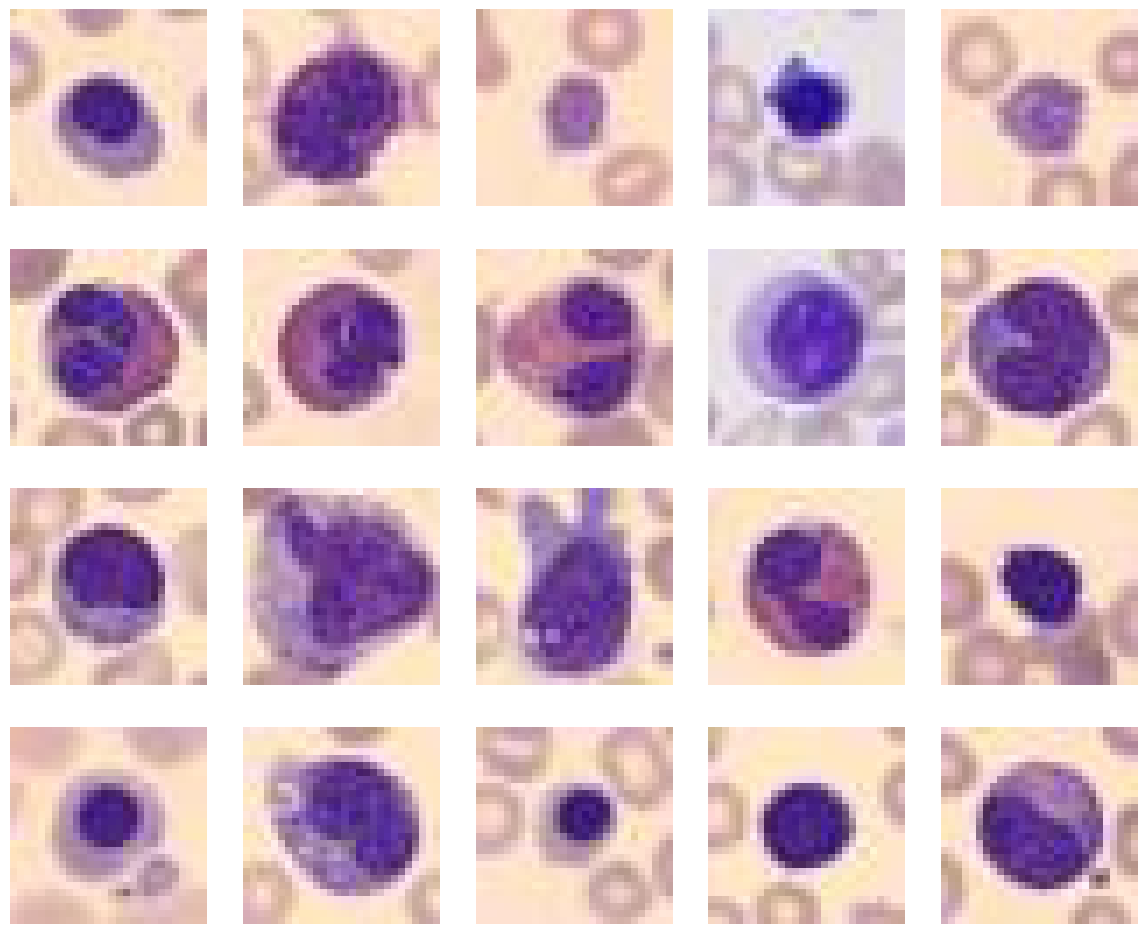

In [ ]:
plt.figure(figsize=(12, 10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(sample_images[i].numpy().astype('uint8'))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=tf.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)       256       
 hNormalization)                                                 
                                                        

In [ ]:
import tensorflow as tf
# Implement early stopping and learning rate scheduling
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

def learning_rate_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(learning_rate_scheduler)

# Assuming train_labels and val_labels are the original labels (not one-hot encoded)
num_classes = 8

# Convert target labels to one-hot encoded arrays
train_labels_onehot = tf.keras.utils.to_categorical(train_labels, num_classes)
val_labels_onehot = tf.keras.utils.to_categorical(val_labels, num_classes)

# Now, your train_labels_onehot and val_labels_onehot should have shapes (batch_size, num_classes)
val_data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/blood_dataset/validation',
                                                  labels='inferred',
                                                  label_mode='categorical',
                                                  image_size=(28, 28),
                                                  batch_size=32,
                                                  shuffle=True,
                                                  seed=42)



Found 1712 files belonging to 8 classes.


In [ ]:
hist = model.fit(
    data,
    validation_data=val_data,  # Use val_data instead of (val_images, val_labels_onehot)
    epochs=10,
    callbacks=[early_stopping,lr_scheduler]
)

Epoch 1/10
374/374 [==============================] - 42s 111ms/step - loss: 0.3206 - accuracy: 0.8846 - val_loss: 1.1269 - val_accuracy: 0.7436 - lr: 0.0010
Epoch 2/10
374/374 [==============================] - 38s 100ms/step - loss: 0.2963 - accuracy: 0.8895 - val_loss: 0.7891 - val_accuracy: 0.7856 - lr: 0.0010
Epoch 3/10
374/374 [==============================] - 41s 109ms/step - loss: 0.2840 - accuracy: 0.8992 - val_loss: 0.5923 - val_accuracy: 0.7868 - lr: 0.0010
Epoch 4/10
374/374 [==============================] - 42s 113ms/step - loss: 0.2690 - accuracy: 0.9021 - val_loss: 0.4243 - val_accuracy: 0.8429 - lr: 0.0010
Epoch 5/10
374/374 [==============================] - 38s 101ms/step - loss: 0.2731 - accuracy: 0.9033 - val_loss: 0.7546 - val_accuracy: 0.7681 - lr: 0.0010
Epoch 6/10
374/374 [==============================] - 38s 101ms/step - loss: 0.2551 - accuracy: 0.9058 - val_loss: 0.4152 - val_accuracy: 0.8575 - lr: 0.0010
Epoch 7/10
374/374 [==============================] 

In [ ]:
model.save('/content/drive/MyDrive/blood_dataset/lstmRNN.h5')

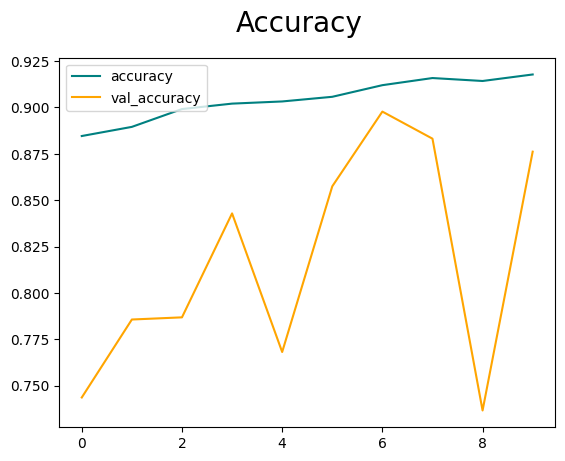

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

test_data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/blood_dataset/test',
                                                  labels='inferred',
                                                  label_mode='categorical',
                                                  image_size=(28, 28),
                                                  batch_size=32,
                                                  shuffle=True,
                                                  seed=42)
Y_pred=model.predict(test_data)
y_pred=np.argmax(Y_pred,axis=1)

print('Confusion Matrix')
cm=confusion_matrix(test_labels,y_pred)
print(cm)


print('Classification Report')

target_names=['basophil', 'eosinophil',  'erythroblast', 'immature granulocytes',  'lymphocyte', 'monocyte', 'neutrophil', 'platelet']

print(classification_report(test_labels,y_pred,target_names=target_names))



Found 3421 files belonging to 8 classes.
107/107 [==============================] - 7s 57ms/step
Confusion Matrix
[[ 26  49  15  32  13  27  55  27]
 [ 66 109  42  95  38  50 149  75]
 [ 34  64  22  39  13  25  72  42]
 [ 61  95  50  79  36  48 132  78]
 [ 27  46  16  27  16  19  62  30]
 [ 23  43  21  43  11  26  75  42]
 [ 61 136  53  96  26  59 141  94]
 [ 54  85  43  61  15  38 102  72]]
Classification Report
                       precision    recall  f1-score   support

             basophil       0.07      0.11      0.09       244
           eosinophil       0.17      0.17      0.17       624
         erythroblast       0.08      0.07      0.08       311
immature granulocytes       0.17      0.14      0.15       579
           lymphocyte       0.10      0.07      0.08       243
             monocyte       0.09      0.09      0.09       284
           neutrophil       0.18      0.21      0.19       666
             platelet       0.16      0.15      0.15       470

             a

In [ ]:
import seaborn as sns
sns.set(font_scale=1.0)
ax=sns.heatmap(cm,annot=True, cmap='summer',cbar=False,linecolor='r',linewidth=3,square=True,xticklabels=target_names,yticklabels=target_names)

sns.set(font_scale=2.0)
ax.set_title('Seaborn confusion matrix with labels\n\n')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')

Text(109.44999999999996, 0.5, 'Predicted Values')